# EDA & Data Cleaning
---
This notebook will be used to clean and explore the data.

In [61]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


---
## Load Data

In [63]:
# read demographic data
# demo = pd.read_excel('../data/combined_state_demo_data_2016_2022.xlsx', sheet_name = 'Data')
demo = pd.read_csv('../data/combined_state_demo_data_2016_2022.csv')
# check for missing values and print the shape
print(demo.isna().sum())
print(demo.shape)
demo.head()

state                               0
year                                0
total_pop                           0
white_pop                           0
black_pop                           1
hispanic_pop                        0
asian_pop                           0
native_pop                         20
islander_pop                      177
multi_race_pop                      0
median_income                       0
poverty_rate                        0
unemployment_rate                   0
unemployed_15_weeks                 0
labor_force_participation_rate      0
hs_grad_rate                        0
bachelors_grad_rate                 0
zhvi                                0
crude_rate_suicide                 12
crude_rate_od                      28
dtype: int64
(357, 20)


,state,year,total_pop,white_pop,black_pop,hispanic_pop,asian_pop,native_pop,islander_pop,multi_race_pop,median_income,poverty_rate,unemployment_rate,unemployed_15_weeks,labor_force_participation_rate,hs_grad_rate,bachelors_grad_rate,zhvi,crude_rate_suicide,crude_rate_od
0,AL,2022,4916000,0.645,0.252,0.048,0.014,0.002,NaN,0.039,59910,13.6,2.5,1.2,57.0,88.8,28.8,217335.1989,11.9,12.5
1,AL,2021,4900800,0.644,0.255,0.047,0.013,0.004,NaN,0.037,56930,15.9,3.4,2.0,56.6,87.9,27.4,193148.7979,14.2,14.6
2,AL,2020,0,0.000,0,0.000,0.000,0,0,0.000,54690,14.9,6.4,1.4,57.2,88.0,27.8,169855.5743,15.2,12.8
3,AL,2019,4767100,0.654,0.265,0.044,0.014,0.004,NaN,0.019,56200,12.9,3.2,1.4,57.7,87.1,26.3,157202.1806,14.8,8.3
4,AL,2018,4752600,0.656,0.265,0.043,0.013,<.01,NaN,0.019,49940,16.0,3.9,1.6,57.3,86.6,25.5,148927.5094,17.0,6.7


In [64]:
# read crime data
crime = pd.read_csv('../data/transformed_crime_data.csv')
# rename the 'data_year' column to 'year' and update column names to lowercase with underscores
crime.columns = crime.columns.str.lower().str.replace(' ', '_')
crime.rename(columns={'data_year': 'year'}, inplace=True)
# check for missing values and print the shape
print(crime.isna().sum())
print(crime.shape)
crime.head()

state                               0
offender_age                        0
year                                0
crimes_against_society              0
fraud_and_other_financial_crimes    0
property_crime                      0
violent_crime                       0
dtype: int64
(312, 7)


,state,offender_age,year,crimes_against_society,fraud_and_other_financial_crimes,property_crime,violent_crime
0,AK,15-24,2021,164.5,38.5,424.5,651.0
1,AK,15-24,2022,156.5,37.5,422.0,648.0
2,AL,15-24,2016,99.0,21.0,79.5,117.0
3,AL,15-24,2017,165.0,13.5,58.5,95.5
4,AL,15-24,2018,33.0,15.5,37.0,52.5


In [65]:
# read youth data
youth = pd.read_csv('../data/youth data.csv')
# update column names to lowercase with underscores
youth.columns = youth.columns.str.lower().str.replace(' ', '_')

print(youth.isna().sum())
print(youth.shape)
youth.head()

state                        0
year                         0
youth_not_in_school          0
youth_in_foster_care       102
youth_living_in_poverty      0
dtype: int64
(306, 5)


,state,year,youth_not_in_school,youth_in_foster_care,youth_living_in_poverty
0,AL,2022,73000,NaN,240000
1,AL,2021,86000,NaN,245000
2,AL,2019,74000,800.0,228000
3,AL,2018,86000,829.0,255000
4,AL,2017,88000,813.0,265000


---
## Merge Data

In [67]:
# merge demographic and crime data
demo_crime = pd.merge(left = demo, right = crime, how = 'left', left_on = ['state','year'], right_on = ['state','year'])

print(demo_crime.shape)
demo_crime.head()

(357, 25)


,state,year,total_pop,white_pop,black_pop,hispanic_pop,asian_pop,native_pop,islander_pop,multi_race_pop,...,hs_grad_rate,bachelors_grad_rate,zhvi,crude_rate_suicide,crude_rate_od,offender_age,crimes_against_society,fraud_and_other_financial_crimes,property_crime,violent_crime
0,AL,2022,4916000,0.645,0.252,0.048,0.014,0.002,NaN,0.039,...,88.8,28.8,217335.1989,11.9,12.5,15-24,4804.0,913.5,6430.5,7584.5
1,AL,2021,4900800,0.644,0.255,0.047,0.013,0.004,NaN,0.037,...,87.9,27.4,193148.7979,14.2,14.6,15-24,3236.5,618.0,5552.0,5527.5
2,AL,2020,0,0.000,0,0.000,0.000,0,0,0.000,...,88.0,27.8,169855.5743,15.2,12.8,15-24,327.0,45.0,325.0,419.5
3,AL,2019,4767100,0.654,0.265,0.044,0.014,0.004,NaN,0.019,...,87.1,26.3,157202.1806,14.8,8.3,15-24,94.0,30.5,171.0,108.5
4,AL,2018,4752600,0.656,0.265,0.043,0.013,<.01,NaN,0.019,...,86.6,25.5,148927.5094,17.0,6.7,15-24,33.0,15.5,37.0,52.5


In [68]:
# merge youth data
combined = pd.merge(left = demo_crime, right = youth, how = 'left', left_on = ['state','year'], right_on = ['state','year'])

In [69]:


# save combined dataframe as .csv
combined.to_csv('../data/state_demo_crime_youth_data_combined.csv',index=False)

print(combined.shape)
print(combined.isna().sum())
combined.head()

(357, 29)
state                                 0
year                                  0
total_pop                             0
white_pop                             0
black_pop                             1
hispanic_pop                          0
asian_pop                             0
native_pop                           20
islander_pop                        177
multi_race_pop                        0
median_income                         0
poverty_rate                          0
unemployment_rate                     0
unemployed_15_weeks                   0
labor_force_participation_rate        0
hs_grad_rate                          0
bachelors_grad_rate                   0
zhvi                                  0
crude_rate_suicide                   12
crude_rate_od                        28
offender_age                         45
crimes_against_society               45
fraud_and_other_financial_crimes     45
property_crime                       45
violent_crime                 

,state,year,total_pop,white_pop,black_pop,hispanic_pop,asian_pop,native_pop,islander_pop,multi_race_pop,...,crude_rate_od,offender_age,crimes_against_society,fraud_and_other_financial_crimes,property_crime,violent_crime,youth_not_in_school,youth_in_foster_care,youth_living_in_poverty,total_crime_count
0,AL,2022,4916000,0.645,0.252,0.048,0.014,0.002,NaN,0.039,...,12.5,15-24,4804.0,913.5,6430.5,7584.5,73000.0,NaN,240000.0,19732.5
1,AL,2021,4900800,0.644,0.255,0.047,0.013,0.004,NaN,0.037,...,14.6,15-24,3236.5,618.0,5552.0,5527.5,86000.0,NaN,245000.0,14934.0
2,AL,2020,0,0.000,0,0.000,0.000,0,0,0.000,...,12.8,15-24,327.0,45.0,325.0,419.5,NaN,NaN,NaN,1116.5
3,AL,2019,4767100,0.654,0.265,0.044,0.014,0.004,NaN,0.019,...,8.3,15-24,94.0,30.5,171.0,108.5,74000.0,800.0,228000.0,404.0
4,AL,2018,4752600,0.656,0.265,0.043,0.013,<.01,NaN,0.019,...,6.7,15-24,33.0,15.5,37.0,52.5,86000.0,829.0,255000.0,138.0


---
## Data Cleaning

### Drop Columns

In [72]:
# drop offender_age
combined.drop(columns = ['offender_age'],
              inplace = True)

print(combined.shape)
combined.head()

(357, 28)


,state,year,total_pop,white_pop,black_pop,hispanic_pop,asian_pop,native_pop,islander_pop,multi_race_pop,...,crude_rate_suicide,crude_rate_od,crimes_against_society,fraud_and_other_financial_crimes,property_crime,violent_crime,youth_not_in_school,youth_in_foster_care,youth_living_in_poverty,total_crime_count
0,AL,2022,4916000,0.645,0.252,0.048,0.014,0.002,NaN,0.039,...,11.9,12.5,4804.0,913.5,6430.5,7584.5,73000.0,NaN,240000.0,19732.5
1,AL,2021,4900800,0.644,0.255,0.047,0.013,0.004,NaN,0.037,...,14.2,14.6,3236.5,618.0,5552.0,5527.5,86000.0,NaN,245000.0,14934.0
2,AL,2020,0,0.000,0,0.000,0.000,0,0,0.000,...,15.2,12.8,327.0,45.0,325.0,419.5,NaN,NaN,NaN,1116.5
3,AL,2019,4767100,0.654,0.265,0.044,0.014,0.004,NaN,0.019,...,14.8,8.3,94.0,30.5,171.0,108.5,74000.0,800.0,228000.0,404.0
4,AL,2018,4752600,0.656,0.265,0.043,0.013,<.01,NaN,0.019,...,17.0,6.7,33.0,15.5,37.0,52.5,86000.0,829.0,255000.0,138.0


### Format Columns

#### Fix Data Types

In [75]:
# check data types
combined.dtypes

state                                object
year                                  int64
total_pop                             int64
white_pop                           float64
black_pop                            object
hispanic_pop                        float64
asian_pop                           float64
native_pop                           object
islander_pop                         object
multi_race_pop                      float64
median_income                         int64
poverty_rate                        float64
unemployment_rate                   float64
unemployed_15_weeks                 float64
labor_force_participation_rate      float64
hs_grad_rate                        float64
bachelors_grad_rate                 float64
zhvi                                float64
crude_rate_suicide                  float64
crude_rate_od                       float64
crimes_against_society              float64
fraud_and_other_financial_crimes    float64
property_crime                  

In [76]:
# fix objects
combined['black_pop'] = combined['black_pop'].astype(str).str.replace('<','').astype(float)
combined['native_pop'] = combined['native_pop'].astype(str).str.replace('<','').astype(float)
combined['islander_pop'] = combined['islander_pop'].astype(str).str.replace('<','').astype(float)

combined.head()

,state,year,total_pop,white_pop,black_pop,hispanic_pop,asian_pop,native_pop,islander_pop,multi_race_pop,...,crude_rate_suicide,crude_rate_od,crimes_against_society,fraud_and_other_financial_crimes,property_crime,violent_crime,youth_not_in_school,youth_in_foster_care,youth_living_in_poverty,total_crime_count
0,AL,2022,4916000,0.645,0.252,0.048,0.014,0.002,NaN,0.039,...,11.9,12.5,4804.0,913.5,6430.5,7584.5,73000.0,NaN,240000.0,19732.5
1,AL,2021,4900800,0.644,0.255,0.047,0.013,0.004,NaN,0.037,...,14.2,14.6,3236.5,618.0,5552.0,5527.5,86000.0,NaN,245000.0,14934.0
2,AL,2020,0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,...,15.2,12.8,327.0,45.0,325.0,419.5,NaN,NaN,NaN,1116.5
3,AL,2019,4767100,0.654,0.265,0.044,0.014,0.004,NaN,0.019,...,14.8,8.3,94.0,30.5,171.0,108.5,74000.0,800.0,228000.0,404.0
4,AL,2018,4752600,0.656,0.265,0.043,0.013,0.010,NaN,0.019,...,17.0,6.7,33.0,15.5,37.0,52.5,86000.0,829.0,255000.0,138.0


In [77]:
# check data types
combined.dtypes

state                                object
year                                  int64
total_pop                             int64
white_pop                           float64
black_pop                           float64
hispanic_pop                        float64
asian_pop                           float64
native_pop                          float64
islander_pop                        float64
multi_race_pop                      float64
median_income                         int64
poverty_rate                        float64
unemployment_rate                   float64
unemployed_15_weeks                 float64
labor_force_participation_rate      float64
hs_grad_rate                        float64
bachelors_grad_rate                 float64
zhvi                                float64
crude_rate_suicide                  float64
crude_rate_od                       float64
crimes_against_society              float64
fraud_and_other_financial_crimes    float64
property_crime                  

### Fix 2020 Population Data

In [79]:
# check population data for 2020
combined[['year','total_pop','white_pop','black_pop',
          'hispanic_pop','asian_pop','native_pop',
          'islander_pop','multi_race_pop']].loc[combined['year'] == 2020]

,year,total_pop,white_pop,black_pop,hispanic_pop,asian_pop,native_pop,islander_pop,multi_race_pop
2,2020,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2020,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,2020,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,2020,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,2020,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,2020,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,2020,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,2020,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,2020,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,2020,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
# fill missing 2020 data with average of 2019 and 2021 data
combined.head()

for row in range(len(combined)):
    if combined.loc[row, 'year'] == 2020:
        combined.loc[row,'total_pop'] = (np.abs(combined['total_pop'][row + 1]) + np.abs(combined['total_pop'][row - 1])) / 2
        combined.loc[row,'white_pop'] = (np.abs(combined['white_pop'][row + 1]) + np.abs(combined['white_pop'][row - 1])) / 2
        combined.loc[row,'black_pop'] = (np.abs(combined['black_pop'][row + 1]) + np.abs(combined['black_pop'][row - 1])) / 2
        combined.loc[row,'hispanic_pop'] = (np.abs(combined['hispanic_pop'][row + 1]) + np.abs(combined['hispanic_pop'][row - 1])) / 2
        combined.loc[row,'asian_pop'] = (np.abs(combined['asian_pop'][row + 1]) + np.abs(combined['asian_pop'][row - 1])) / 2
        combined.loc[row,'native_pop'] = (np.abs(combined['native_pop'][row + 1]) + np.abs(combined['native_pop'][row - 1])) / 2
        combined.loc[row,'islander_pop'] = (np.abs(combined['islander_pop'][row + 1]) + np.abs(combined['islander_pop'][row - 1])) / 2
        combined.loc[row,'multi_race_pop'] = (np.abs(combined['multi_race_pop'][row + 1]) + np.abs(combined['multi_race_pop'][row - 1])) / 2

combined.head()    

,state,year,total_pop,white_pop,black_pop,hispanic_pop,asian_pop,native_pop,islander_pop,multi_race_pop,...,crude_rate_suicide,crude_rate_od,crimes_against_society,fraud_and_other_financial_crimes,property_crime,violent_crime,youth_not_in_school,youth_in_foster_care,youth_living_in_poverty,total_crime_count
0,AL,2022,4916000,0.645,0.252,0.0480,0.0140,0.002,NaN,0.039,...,11.9,12.5,4804.0,913.5,6430.5,7584.5,73000.0,NaN,240000.0,19732.5
1,AL,2021,4900800,0.644,0.255,0.0470,0.0130,0.004,NaN,0.037,...,14.2,14.6,3236.5,618.0,5552.0,5527.5,86000.0,NaN,245000.0,14934.0
2,AL,2020,4833950,0.649,0.260,0.0455,0.0135,0.004,NaN,0.028,...,15.2,12.8,327.0,45.0,325.0,419.5,NaN,NaN,NaN,1116.5
3,AL,2019,4767100,0.654,0.265,0.0440,0.0140,0.004,NaN,0.019,...,14.8,8.3,94.0,30.5,171.0,108.5,74000.0,800.0,228000.0,404.0
4,AL,2018,4752600,0.656,0.265,0.0430,0.0130,0.010,NaN,0.019,...,17.0,6.7,33.0,15.5,37.0,52.5,86000.0,829.0,255000.0,138.0


In [81]:
# check population data for 2020

combined[['year','total_pop','white_pop','black_pop',
          'hispanic_pop','asian_pop','native_pop',
          'islander_pop','multi_race_pop']].loc[combined['year'] == 2020]

,year,total_pop,white_pop,black_pop,hispanic_pop,asian_pop,native_pop,islander_pop,multi_race_pop
2,2020,4833950,0.6490,0.2600,0.0455,0.0135,0.0040,NaN,0.0280
9,2020,700200,0.5895,0.0240,0.0685,0.0650,0.1445,0.0150,0.0940
16,2020,7102650,0.5315,0.0420,0.3210,0.0330,0.0360,0.0020,0.0355
23,2020,2929450,0.7020,0.1480,0.0805,0.0150,0.0050,0.0040,0.0460
30,2020,38510950,0.3530,0.0520,0.3990,0.1490,0.0030,0.0035,0.0400
37,2020,5638000,0.6655,0.0370,0.2200,0.0315,0.0040,0.0015,0.0405
44,2020,3477400,0.6425,0.0985,0.1735,0.0465,0.0015,NaN,0.0375
51,2020,957200,0.6045,0.2105,0.0995,0.0400,NaN,NaN,0.0425
58,2020,652350,0.3630,0.4405,0.1135,0.0375,NaN,NaN,0.0430
65,2020,21148350,0.5210,0.1470,0.2680,0.0275,0.0015,0.0005,0.0350


#### Convert % Columns to Rates

In [83]:
# Convert % columns to rates
print(f"Poverty Rate min BEFORE: {combined['poverty_rate'].min()}")
combined['poverty_rate'] = combined['poverty_rate'] / 100
print(f"Poverty Rate min AFTER: {combined['poverty_rate'].min()}")
print("=" * 30)

print(f"Unemployment Rate min BEFORE: {combined['unemployment_rate'].min()}")
combined['unemployment_rate'] = combined['unemployment_rate'] / 100
print(f"Unemployment Rate min AFTER: {combined['unemployment_rate'].min()}")
print("=" * 30)

print(f"Unemployed 15 Weeks Rate min BEFORE: {combined['unemployed_15_weeks'].min()}")
combined['unemployed_15_weeks'] = combined['unemployed_15_weeks'] / 100
print(f"Unemployed 15 Weeks Rate min AFTER: {combined['unemployed_15_weeks'].min()}")
print("=" * 30)

print(f"Labor Force Participation Rate min BEFORE: {combined['labor_force_participation_rate'].min()}")
combined['labor_force_participation_rate'] = combined['labor_force_participation_rate'] / 100
print(f"Labor Force Participation Rate min AFTER: {combined['labor_force_participation_rate'].min()}")
print("=" * 30)

print(f"High School+ Graduation Rate min BEFORE: {combined['hs_grad_rate'].min()}")
combined['hs_grad_rate'] = combined['hs_grad_rate'] / 100
print(f"High School+ Graduation Rate min AFTER: {combined['hs_grad_rate'].min()}")
print("=" * 30)

print(f"Bachelors+ Graduation Rate min BEFORE: {combined['bachelors_grad_rate'].min()}")
combined['bachelors_grad_rate'] = combined['bachelors_grad_rate'] / 100
print(f"Bachelors+ Graduation Rate min AFTER: {combined['bachelors_grad_rate'].min()}")
print("=" * 30)

combined.head()


Poverty Rate min BEFORE: 3.7
Poverty Rate min AFTER: 0.037000000000000005
Unemployment Rate min BEFORE: 2.0
Unemployment Rate min AFTER: 0.02
Unemployed 15 Weeks Rate min BEFORE: 0.5
Unemployed 15 Weeks Rate min AFTER: 0.005
Labor Force Participation Rate min BEFORE: 53.3
Labor Force Participation Rate min AFTER: 0.5329999999999999
High School+ Graduation Rate min BEFORE: 82.4
High School+ Graduation Rate min AFTER: 0.8240000000000001
Bachelors+ Graduation Rate min BEFORE: 20.2
Bachelors+ Graduation Rate min AFTER: 0.20199999999999999


,state,year,total_pop,white_pop,black_pop,hispanic_pop,asian_pop,native_pop,islander_pop,multi_race_pop,...,crude_rate_suicide,crude_rate_od,crimes_against_society,fraud_and_other_financial_crimes,property_crime,violent_crime,youth_not_in_school,youth_in_foster_care,youth_living_in_poverty,total_crime_count
0,AL,2022,4916000,0.645,0.252,0.0480,0.0140,0.002,NaN,0.039,...,11.9,12.5,4804.0,913.5,6430.5,7584.5,73000.0,NaN,240000.0,19732.5
1,AL,2021,4900800,0.644,0.255,0.0470,0.0130,0.004,NaN,0.037,...,14.2,14.6,3236.5,618.0,5552.0,5527.5,86000.0,NaN,245000.0,14934.0
2,AL,2020,4833950,0.649,0.260,0.0455,0.0135,0.004,NaN,0.028,...,15.2,12.8,327.0,45.0,325.0,419.5,NaN,NaN,NaN,1116.5
3,AL,2019,4767100,0.654,0.265,0.0440,0.0140,0.004,NaN,0.019,...,14.8,8.3,94.0,30.5,171.0,108.5,74000.0,800.0,228000.0,404.0
4,AL,2018,4752600,0.656,0.265,0.0430,0.0130,0.010,NaN,0.019,...,17.0,6.7,33.0,15.5,37.0,52.5,86000.0,829.0,255000.0,138.0


### Remove Nulls

In [85]:
# check nulls
print(combined.shape)
combined.isnull().sum()

(357, 28)


state                                 0
year                                  0
total_pop                             0
white_pop                             0
black_pop                             1
hispanic_pop                          0
asian_pop                             0
native_pop                           26
islander_pop                        209
multi_race_pop                        0
median_income                         0
poverty_rate                          0
unemployment_rate                     0
unemployed_15_weeks                   0
labor_force_participation_rate        0
hs_grad_rate                          0
bachelors_grad_rate                   0
zhvi                                  0
crude_rate_suicide                   12
crude_rate_od                        28
crimes_against_society               45
fraud_and_other_financial_crimes     45
property_crime                       45
violent_crime                        45
youth_not_in_school                  51


In [86]:
# replace NaN in native_pop and islander_pop with 0
# these were states that didn't report having a specific pop
combined['black_pop'] = combined['black_pop'].fillna(0)
combined['native_pop'] = combined['native_pop'].fillna(0)
combined['islander_pop'] = combined['islander_pop'].fillna(0)

print(f"black_pop null count: {combined['black_pop'].isnull().sum()}")
print(f"native_pop null count: {combined['native_pop'].isnull().sum()}")
print(f"islander_pop null count: {combined['islander_pop'].isnull().sum()}")

black_pop null count: 0
native_pop null count: 0
islander_pop null count: 0


### Filling missing values with Group-Based Mean Imputation

In [88]:
youth_not_in_school_null = combined[combined['youth_not_in_school'].isnull()]
youth_not_in_school_null.head()

,state,year,total_pop,white_pop,black_pop,hispanic_pop,asian_pop,native_pop,islander_pop,multi_race_pop,...,crude_rate_suicide,crude_rate_od,crimes_against_society,fraud_and_other_financial_crimes,property_crime,violent_crime,youth_not_in_school,youth_in_foster_care,youth_living_in_poverty,total_crime_count
2,AL,2020,4833950,0.6490,0.260,0.0455,0.0135,0.0040,0.0000,0.0280,...,15.2,12.8,327.0,45.0,325.0,419.5,NaN,NaN,NaN,1116.5
9,AK,2020,700200,0.5895,0.024,0.0685,0.0650,0.1445,0.0150,0.0940,...,48.2,23.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
16,AZ,2020,7102650,0.5315,0.042,0.3210,0.0330,0.0360,0.0020,0.0355,...,19.0,37.6,1966.0,132.5,1609.0,1675.0,NaN,NaN,NaN,5382.5
23,AR,2020,2929450,0.7020,0.148,0.0805,0.0150,0.0050,0.0040,0.0460,...,19.6,10.5,3316.0,674.0,5676.5,5844.5,NaN,NaN,NaN,15511.0
30,CA,2020,38510950,0.3530,0.052,0.3990,0.1490,0.0030,0.0035,0.0400,...,9.3,19.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [89]:
# fill missing values in 'youth_columns' by taking the mean for each state
youth_columns = ['youth_not_in_school', 'youth_in_foster_care', 'youth_living_in_poverty']

# group-based mean imputation for each column within each state
for column in youth_columns:
    combined[column] = combined.groupby('state')[column].transform(lambda x: x.fillna(x.mean()))
combined.head()


,state,year,total_pop,white_pop,black_pop,hispanic_pop,asian_pop,native_pop,islander_pop,multi_race_pop,...,crude_rate_suicide,crude_rate_od,crimes_against_society,fraud_and_other_financial_crimes,property_crime,violent_crime,youth_not_in_school,youth_in_foster_care,youth_living_in_poverty,total_crime_count
0,AL,2022,4916000,0.645,0.252,0.0480,0.0140,0.002,0.0,0.039,...,11.9,12.5,4804.0,913.5,6430.5,7584.5,73000.0,819.25,240000.000000,19732.5
1,AL,2021,4900800,0.644,0.255,0.0470,0.0130,0.004,0.0,0.037,...,14.2,14.6,3236.5,618.0,5552.0,5527.5,86000.0,819.25,245000.000000,14934.0
2,AL,2020,4833950,0.649,0.260,0.0455,0.0135,0.004,0.0,0.028,...,15.2,12.8,327.0,45.0,325.0,419.5,82000.0,819.25,249833.333333,1116.5
3,AL,2019,4767100,0.654,0.265,0.0440,0.0140,0.004,0.0,0.019,...,14.8,8.3,94.0,30.5,171.0,108.5,74000.0,800.00,228000.000000,404.0
4,AL,2018,4752600,0.656,0.265,0.0430,0.0130,0.010,0.0,0.019,...,17.0,6.7,33.0,15.5,37.0,52.5,86000.0,829.00,255000.000000,138.0


### Distribution of Target

Text(0, 0.5, 'Frequency')

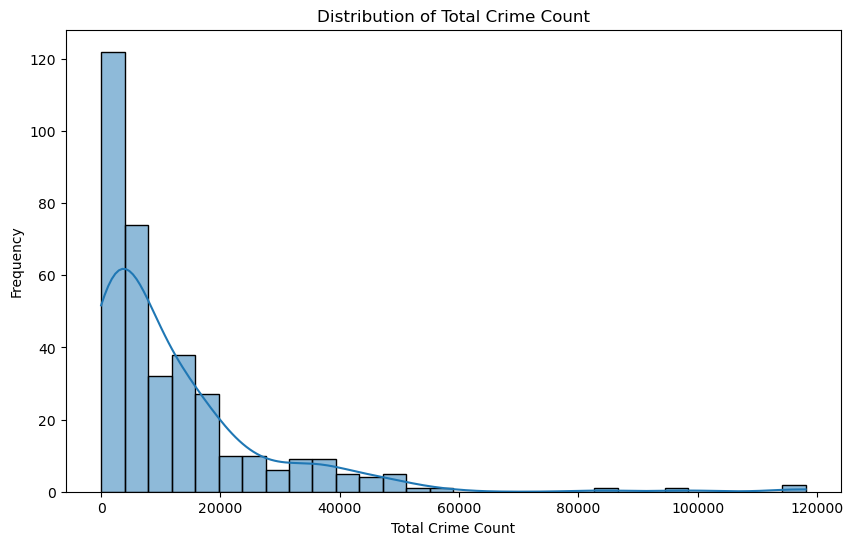

In [91]:

# distribution of 'total_crime_count'
plt.figure(figsize=(10, 6))
sns.histplot(combined['total_crime_count'], kde=True, bins=30)
plt.title('Distribution of Total Crime Count')
plt.xlabel('Total Crime Count')
plt.ylabel('Frequency')

The distribution plot for total_crime_count shows the frequency of crime counts, with a strong concentration around lower crime counts, indicating a right-skewed distribution. This suggest that most states have relatively lower total crime counts, with a few high-crime instances as outliers. We need to take log of our data.

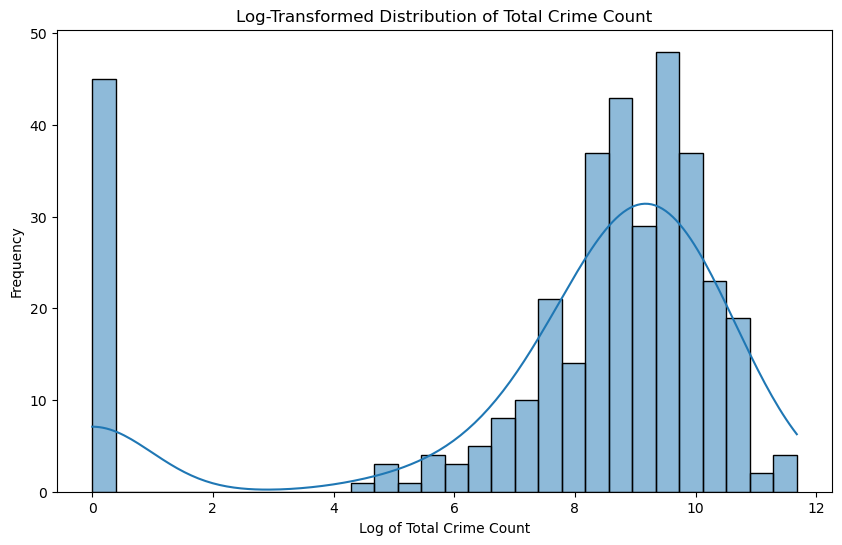

In [93]:
# Log transformation to address right-skewness in 'total_crime_count' 
# apply log transformation (adding a small constant to avoid log(0))
combined['log_total_crime_count'] = np.log1p(combined['total_crime_count'])

# distribution of log-transformed 'total_crime_count'
plt.figure(figsize=(10, 6))
sns.histplot(combined['log_total_crime_count'], kde=True, bins=30)
plt.title('Log-Transformed Distribution of Total Crime Count')
plt.xlabel('Log of Total Crime Count')
plt.ylabel('Frequency')
plt.show()


The log-transformed distribution of total_crime_count is more normalized, reducing the impact of extreme values and making it more suitable for modeling. This transformation helps in cases where the data is highly skewed, as it makes patterns easier to detect and improves model performance.